<a href="https://colab.research.google.com/github/alousada/The-Capstone-Project/blob/main/Week%203%20-%20(1)%20first%20part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>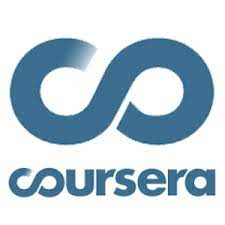</p>

<h1>Segmenting and Clustering Neighborhoods on Toronto</h1>
<h2>Part I : scraping the data from Wikipedia</h2>

This script will scrap the Wikipedia page to select postal codes data. 

The main requisites : 

- The dataframe consist of three columns: PostalCode, Borough, and Neighborhood.
- Only process the cells that have an assigned borough.
- More than one neighborhood can exist in one postal code area. 
- If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
- Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

 Wikipedia : https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
 

# Install Libraries

In [1]:
!pip install folium

In [2]:
!pip install geopy


# Import Libraries


In [5]:
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle request

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# tranforming json file into a pandas dataframe library
import json

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML
from IPython.display import display_html

print('Libraries imported.')

Libraries imported.


# Import the document

In [9]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'xml')
print(soup.title)

tab = str(soup.table)
display_html(tab,raw=True)


<title>List of postal codes of Canada: M - Wikipedia</title>


M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale)
M1CScarborough(Rouge Hill / Port Union / Highland Creek),M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Old Burnhamthorpe / Markland Wood)
M1EScarborough(Guildwood / Morningside / West Hill),M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned
M1HScarborough(Cedarbrae),M2HNorth York(Hillcrest Village),M3HNorth York(Bathurst Manor / Wilson Heights / Downsview North),M4HEast York(Thorncliffe Park),M5HDowntown Toronto(Richmond / Adelaide / King),M6HWest Toronto(Dufferin / Dovercourt Village),M7HNot assigned,M8HNot assigned,M9HNot assigned
M1JScarborough(Scarborough Village),M2JNorth York(Fairview / Henry Farm / Oriole),M3JNorth York(Northwood Park / York University),M4JEast YorkEast Toronto(The Danforth East),M5JDowntown Toronto(Harbourfront East / Union Station / Toronto Islands),M6JWest Toronto(Little Portugal / Trinity),M7JNot assigned,M8JNot assigned,M9JNot assigned
M1KScarborough(Kennedy Park / Ionview / East Birchmount Park),M2KNorth York(Bayview Village),M3KNorth York(Downsview)East (CFB Toronto),M4KEast Toronto(The Danforth West / Riverdale),M5KDowntown Toronto(Toronto Dominion Centre / Design Exchange),M6KWest Toronto(Brockton / Parkdale Village / Exhibition Place),M7KNot assigned,M8KNot assigned,M9KNot assigned
M1LScarborough(Golden Mile / Clairlea / Oakridge),M2LNorth York(York Mills / Silver Hills),M3LNorth York(Downsview)West,M4LEast Toronto(India Bazaar / The Beaches West),M5LDowntown Toronto(Commerce Court / Victoria Hotel),M6LNorth York(North Park / Maple Leaf Park / Upwood Park),M7LNot assigned,M8LNot assigned,M9LNorth York(Humber Summit)
M1MScarborough(Cliffside / Cliffcrest / Scarborough Village West),M2MNorth York(Willowdale / Newtonbrook),M3MNorth York(Downsview)Central,M4MEast Toronto(Studio District),M5MNorth York(Bedford Park / Lawrence Manor East),M6MYork(Del Ray / Mount Dennis / Keelsdale and Silverthorn),M7MNot assigned,M8MNot assigned,M9MNorth York(Humberlea / Emery)
M1NScarborough(Birch Cliff / Cliffside West),M2NNorth York(Willowdale)South,M3NNorth York(Downsview)Northwest,M4NCentral Toronto(Lawrence Park),M5NCentral Toronto(Roselawn),M6NYork(Runnymede / The Junction North),M7NNot assigned,M8NNot assigned,M9NYork(Weston)


# Scraping the Data

In [10]:
# loop through table, collect the each of 3 columns
# Scrape the wikipedia page of Toronto

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
      # Create three columns named as "PostalCode","Borough" & "Neighborhood"
        cell['PostalCode'] = row.p.text[:3] # store only first three letter from the test of <p> tab.(Ex: M3A )
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        # here we replace some symbols like "(" , ")" , "/" from the neighborhood name.
        table_contents.append(cell)

df=pd.DataFrame(table_contents)
# compress some big borough name by smaller one
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [12]:
df.shape

(103, 3)

# Data Cleasing

In [13]:
# drop rows having null value and value assigned as "Not assigned"
df_dropna = df.dropna()
empty = 'Not assigned'
df_dropna = df_dropna[(df_dropna.PostalCode != empty ) & (df_dropna.Borough != empty) & (df_dropna.Neighborhood != empty)].reset_index(drop=True)

In [14]:
# check for missing value
df_dropna.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

In [15]:
#Check if we still have any Neighborhoods that are Not Assigned
df_dropna.loc[df_dropna['Borough'].isin(["Not assigned"])]

,PostalCode,Borough,Neighborhood


In [16]:
df = df_dropna
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


# Final Processing

In [17]:
# save this dataframe in a CSV file
df.to_csv('postal_codes_toronto.csv')

In [19]:
# shape of dataframe
print(f'The shape of our dataframe is {df.shape} with the following details:\n- {df.shape[0]} rows\n- {df.shape[1]} columns\n- {len(df.PostalCode.unique())} unique postal codes\n- {len(df.Borough.unique())} unique boroughs')

The shape of our dataframe is (103, 3) with the following details:
- 103 rows
- 3 columns
- 103 unique postal codes
- 15 unique boroughs
